<a href="https://colab.research.google.com/github/nurfnick/Calculus_1/blob/main/Project_Part_3_Implicit_and_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3 

There are a few new things happening in project part 3.

## Implicit Functions

To plot an implicit function we'll use sympy

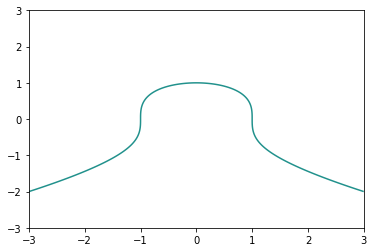

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3,1000))

plt.contour(x,y,x**2 + y**3-1,0)

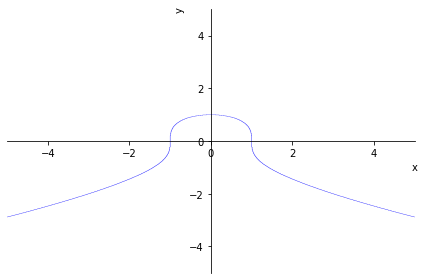

In [16]:
from sympy import *

x, y = symbols('x y')

plot_implicit(Eq(x**2 + y**3, 1))

Here I have plotted 
$$
x^2+y^3 =1
$$

To take the derivative of this function, we use the following technique

In [17]:

y = Function('y')(x)

diff(x**2+y**3,x)

2*x + 3*y(x)**2*Derivative(y(x), x)

But this did not solve for the derivative.  The following will

In [23]:
var( 'x y' )
formula = x**2 + y**3 - 1   # to represent x^2+y^3=1
idiff( formula, y, x )

-2*x/(3*y**2)

The big difference being that it solves the derivative for you!

## Vertical Tangents

Vertical tangents will be where the derivative of your function is not defined.  We see that here at $y=0$.  To find that, we solve the equation for x when $y=0$.

In [24]:
solve(formula.subs(y,0),x)

[-1, 1]

$x=\pm1$ is clearly where the tangent line is vertical.  Let's graph it too.

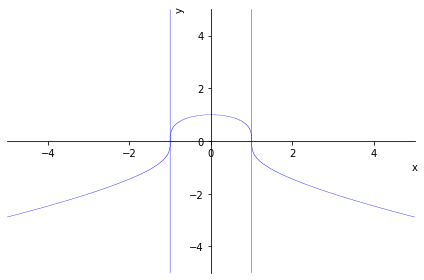

In [44]:


p1 = plot_implicit(Eq(x**2 + y**3, 1), show = False)
p2 = plot_implicit(x-1, show = False)
p3 = plot_implicit(Eq(x, -1), show = False)
p1.extend(p2)
p1.extend(p3)

p1.show()


I had to use implicit to show the veritcal lines.  `extend` will add the graphic to the previous graphic object.

## Plotting with Extra Points

Let's say I have a cool function and what to show some features of it.  I can plot the function and some points.  I can even label those rad points.

In [80]:
f = 5*x**3-3*x**2 -2*x +3

df = diff(f,x)

ddf = diff(df,x)

solve(df,x)#interesing x in a list

[1/5 - sqrt(39)/15, 1/5 + sqrt(39)/15]

In [84]:
[f.subs(x,a).simplify() for a in solve(df,x)] #interesting ys in a list corresponding to the x's

[26*sqrt(39)/225 + 63/25, 63/25 - 26*sqrt(39)/225]

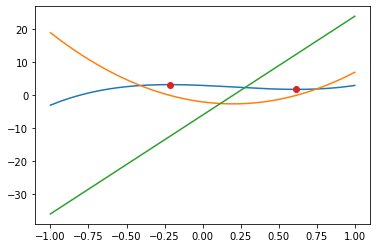

In [92]:
criticalx = solve(df,x)#interesing x
criticaly = [f.subs(x,a).simplify() for a in solve(df,x)]


xx = np.linspace(-1, 1, 1000)#limits for graph
yy = lambdify(x, [f,df,ddf])(xx)#outputs of the functions 
plt.plot(xx, np.transpose(yy)) #plots of the functions
plt.plot(criticalx, criticaly, 'o')# plot critical points with o
plt.show()# show it all together

